In [152]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences, to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [117]:
#loading dataset
train_ds = pd.read_csv('Sentiment Analysis Dataset/train.csv',encoding='latin1')
validation_ds = pd.read_csv('Sentiment Analysis Dataset/test.csv',encoding='latin1')

train_ds = train_ds[['text','sentiment']]
validation_ds = validation_ds[['text','sentiment']]

In [118]:
#removing NULL
train_ds['text'].fillna('',inplace=True)
validation_ds['text'].fillna('',inplace=True)

In [119]:
#Turning 'positive' and 'negative' into numeric
def func(sentiment):
    if sentiment =='positive':
        return 0
    elif sentiment =='negative':
        return 1
    else:
        return 2
train_ds['sentiment'] = train_ds['sentiment'].apply(func)
validation_ds['sentiment'] = validation_ds['sentiment'].apply(func)

In [120]:
x_train = np.array(train_ds['text'].tolist())
y_train = np.array(train_ds['sentiment'].tolist())
x_test = np.array(validation_ds['text'].tolist())
y_test = np.array(validation_ds['sentiment'].tolist())

In [121]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [122]:
#tokenizing the text
tokenizer = Tokenizer(num_words=20000)

tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [123]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [124]:
from keras.utils import pad_sequences
x_train = pad_sequences(x_train, padding='post', maxlen=35) 
x_test = pad_sequences(x_test, padding='post', maxlen=35)  

In [144]:
x_train[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

In [145]:
x_train.shape

(27481, 35)

In [190]:
#building RNN model
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5, input_length=100))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [198]:
#compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [200]:
#training
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4467 - loss: 1.0439 - val_accuracy: 0.3942 - val_loss: 0.8874
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6544 - loss: 0.7858 - val_accuracy: 0.7485 - val_loss: 0.7013
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7374 - loss: 0.6520 - val_accuracy: 0.7481 - val_loss: 0.6625
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7987 - loss: 0.5354 - val_accuracy: 0.7479 - val_loss: 0.6773
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8387 - loss: 0.4402 - val_accuracy: 0.7356 - val_loss: 0.7140
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8711 - loss: 0.3662 - val_accuracy: 0.7352 - val_loss: 0.7067
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8948 - loss: 0.3102 - val_accuracy: 0.7202 - val_loss: 0.8653
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9009 - loss: 0.2880 - val_accuracy: 0.

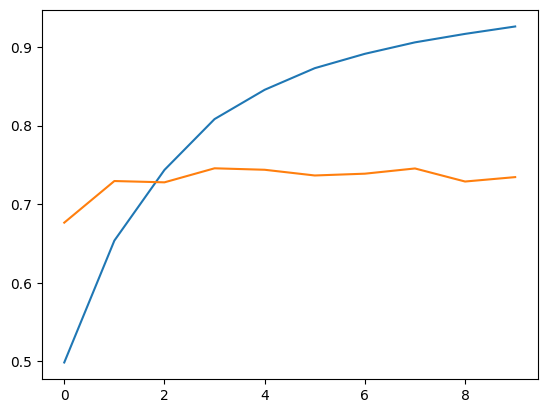

In [176]:
#performance plot
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [131]:
# testing
def predict(text):
    new_text_seq = tokenizer.texts_to_sequences([text])
    new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=100)  
    predictions = model.predict(new_text_padded)
    predicted_class_index = predictions.argmax(axis=-1)
    if predicted_class_index[0] == 0:
        return "Positive Sentiment"
    elif predicted_class_index[0] == 1:
        return "Negative Sentiment"
    else:
        return "Neutral Sentiment"


In [132]:
predict("The movie was bad, i will not recommend this movie to anyone")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


'Negative Sentiment'

In [133]:
predict("The movie was good, i will recommend this movie to anyone")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'Positive Sentiment'

In [134]:
predict("The movie was mid,  i will recommend this movie to anyone")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'Positive Sentiment'